<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Interacting-with-ATP" data-toc-modified-id="Interacting-with-ATP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Interacting with ATP</a></span><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#Ploting" data-toc-modified-id="Ploting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ploting</a></span></li></ul></li><li><span><a href="#Interacting-with-Matlab-files" data-toc-modified-id="Interacting-with-Matlab-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interacting with <em>Matlab</em> files</a></span><ul class="toc-item"><li><span><a href="#Accediendo-às-variáveis-e-tratando-os-dados" data-toc-modified-id="Accediendo-às-variáveis-e-tratando-os-dados-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Accediendo às variáveis e tratando os dados</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></div>

# Interacting with ATP

*Python* has the possibility to run external programs in the same way as if it were the command promt. To do this it is necessary to import the module **subprocess** and use the method `run (commando, shell = True)`. ** Note: The shell = True option it is necessary for Python to understand that it will run ATP on the command promt**.

The following is an example to run ATP either on windows or Linux. The sys and os modules were used to detect the working directory and the type of operating system.

Any ATP file can be run from the code by modifying *fileName*

In [1]:
# Ejecuta el archivo de atp
import subprocess
import sys, os

fileName = 'estudio_v2.atp'

# Get the opperative system
operativeSystem = sys.platform

# get the working directory
if operativeSystem == 'linux':
    working_dir = os.getcwd() + "/" + 'ATP' + "/"
    ATPexe = os.environ['HOME'] + '/' + '.wine/drive_c/Program Files/ATP/tools/runAtp.exe'
    subprocess.run(['wine ' + '"' + ATPexe + '" ' + '"' + working_dir + fileName + '"'], shell=True)
else:
    working_dir = os.getcwd() + "\\" + 'ATP' + "\\"
    command = r"runAtp.exe" ,r'"' + working_dir + fileName + '"'
    subprocess.run([r"runAtp.exe" ,r'"' + working_dir + fileName + '"'])
    #!runAtp.exe "C:\\Users\\jsacostas\\Dropbox\\Python\\Course-Python-PSCAD\\ATP\\estudio_v2.atp"

## Data processing
After running the ATP file, a .txt file is generated with the system solution. To import the data in *Python* it is necessary to make a treatment to the file. For this we will use the pandas module.

    Remember that to generate the .txt file, it is necessary to modify the ATP startup by opening the tab number 7,  then change PL4TYP to .txt and FMTPL4 to wide08 or wide10.

In [2]:
import pandas as pd

filepath = working_dir + fileName[:len(fileName)-4] + '.txt'

df = pd.read_csv(filepath,delim_whitespace=True,skiprows=[0,2]).dropna()
df.tail()

,in,FA,FB,FC,FA1,FB1,FC1,L100A,L100B,L100C,...,LFA,LFB,LFC,LPXA.1,LPXB.1,LPXC.1,LFA.1,LFB.1,LFC.1,FALLA
19997,.99985,423360.,-108000.0,-315000.0,423265.0,-108000.0,-315000.0,-142.39,-8042.5,30755.0,...,545902.0,-240000.0,-145000.0,-2.1640,0.0,0.0,6.700000e-14,6.500000e-16,-3.000000e-15,-2.1640
19998,.9999,421029.,-99984.0,-321000.0,421124.0,-100000.0,-321000.0,-141.93,-11186.0,33970.0,...,256279.0,-209000.0,-208000.0,-2.0838,0.0,0.0,-1.000000e-15,-6.000000e-16,-4.000000e-15,-2.0838
19999,.99995,418548.,-91891.0,-327000.0,418453.0,-91870.0,-327000.0,-141.45,-14326.0,37177.2,...,546807.0,-227000.0,-158000.0,-2.0032,0.0,0.0,1.500000e-15,6.500000e-16,-3.000000e-15,-2.0032
20000,1.0,415919.,-83765.0,-332000.0,416014.0,-83787.0,-332000.0,-140.95,-17461.0,40375.6,...,256899.0,-196000.0,-222000.0,-1.9224,0.0,0.0,-1.000000e-15,-6.000000e-16,-4.000000e-15,-1.9224
20001,-9999.,415919.,-83765.0,-332000.0,416014.0,-83787.0,-332000.0,-140.95,-17461.0,40375.6,...,256899.0,-196000.0,-222000.0,-1.9224,0.0,0.0,-1.000000e-15,-6.000000e-16,-4.000000e-15,-1.9224


## Ploting
You can plot the results as usual:

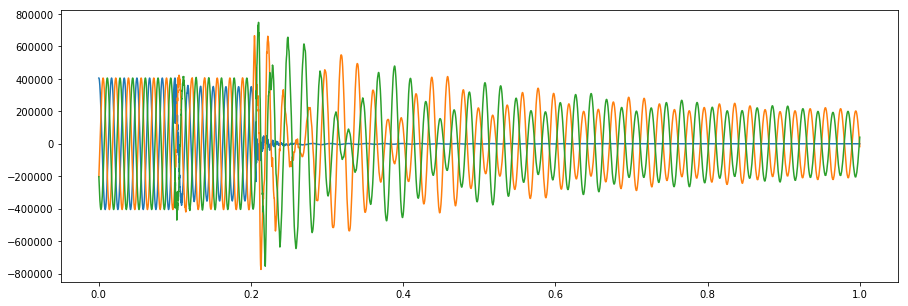

In [3]:
# Plot  % matplotlib inline|nbagg
# Usar matplotlib 2.0.0 e numpy 1.12.1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
t = df['in']
Vin = df.loc[:,'L100A':'L100C']

plt.figure(figsize = (15,5))
plt.plot(t[:-1],Vin[:-1])
plt.show()

# Interacting with *Matlab* files

It is possible to read*.mat* files with the module *scipy.io* and the metod *loadmat()*

In [4]:
import scipy.io as sio

folder = 'Matlab/'

mat_contents = sio.loadmat(folder + 'test_matlab.mat') # Importa o arquivo .mat

The *matlab data is imported in dictionaries, so you can see their keys with the method **keys()**. 

In [5]:
print (mat_contents.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Po', 'fobj_op', 'mostrar', 'Fi2', 'GWt', 'Fo', 'n_circ', 'Vl', 'f', 'rsuelo', 'flechasw', 'feixemax', 'mdcmax', 'hmax', 'tamb', 'vanoviento', 'SIL_Original', 'Costo_Original', 'ROW_Original', 'Altura_Original', 'tty', 'ht', 'Cx', 'Cy', 'cty', 'cf', 'D', 'h', 'cnum', 'rx', 'ry', 'rxc', 'ryc', 'Ecrit_aux', 'Rext', 'Rcc', 'kgkm', 'kgf', 'secc', 'Rin', 'Ecrit', 'costkgkm', 'flechaf', 'flechaf2', 'flechaEDS', 'Pb', 'dr', 'Df', 'G', 'x', 'y', 'it', 'G_aux', 'GW', 'Z', 'Y', 'C', 'Q', 'E', 'Esup', 'bc', 'mdc', 'Zabc', 'Yabc', 'Zabct', 'Yabct', 'Z012', 'Y012', 'Z0', 'Y0', 'Zc', 'SIL', 'SILt', 'GWs', 'EMAGmax', 'Zs', 'Ys', 'Cs', 'Qs', 'Pl', 'P0t', 'largura', 'Qt', 'cTpy', 'CtX', 'CtY', 'Cm', 'CmT', 'feixe', 'Esup_aux', 'ind', 'costo', 'altura', 'f1', 'f2', 'f3', 'f4', 'W', 'Fo2', 'p1_0', 'p2_0', 'p1_1', 'p2_1', 'p1_2', 'p2_2', 'p1', 'p2', 'p3', 'p4', 'p5_0', 'p5', 'p6', 'p7', 'p8', 'P', 'name', 'longitud', 'Pcarga', 'fp', 'Pcomp', 'Vf', 'Re

## Accediendo às variáveis e tratando os dados

Note that mat_contents is a dictionary, so it is possible to access each one of the variables in the usual way with the dictionaries. However, the data loaded from mat_contents are tuples (immutable). To be able to do operations with them, it is necessary to transform them. In this case, we are going to transform the variables into column vectors using the *reshape()* method inside the ** numpy ** module

In [6]:
import numpy as np

GW = (mat_contents['GWt'])
xc = (mat_contents['GWs'][:,4]).reshape([-1,1])
yc = (mat_contents['GWs'][:,5]).reshape([-1,1])
r  = (mat_contents['GWs'][:,1]).reshape([-1,1])
q  = (mat_contents['Qs'][:,0]).reshape([-1,1])

## Plotting
you can plor any variable as usual:

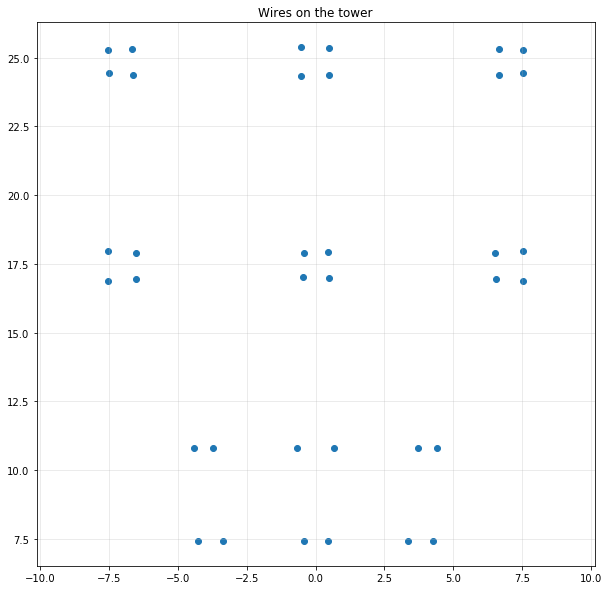

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.scatter(xc, yc)
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.title('Wires on the tower')
plt.show()